In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from matplotlib.ticker import FixedLocator

In [2]:
df = pd.read_csv("../Mental health 2023./CSV/mental_disorders_data.csv")
df.shape

(6468, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      6468 non-null   int64  
 1   Entity                     6468 non-null   object 
 2   Code                       5488 non-null   object 
 3   Year                       6468 non-null   int64  
 4   Schizophrenia (%)          6468 non-null   float64
 5   Bipolar disorder (%)       6468 non-null   float64
 6   Eating disorders (%)       6468 non-null   float64
 7   Anxiety disorders (%)      6468 non-null   float64
 8   Drug use disorders (%)     6468 non-null   float64
 9   Depression (%)             6468 non-null   float64
 10  Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 556.0+ KB


In [4]:
#count, mean, standard deviation, minimum, and quartiles for each numerical column.
df.describe()

,index,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,3233.500000,2003.500000,0.211644,0.719145,0.239998,3.989921,0.862278,3.497654,1.585821
std,1867.295103,8.078372,0.044253,0.171589,0.158141,1.167526,0.460679,0.655859,0.860283
min,0.000000,1990.000000,0.146902,0.314535,0.073908,2.023393,0.383650,2.139903,0.446940
25%,1616.750000,1996.750000,0.181529,0.615533,0.122387,3.188824,0.535064,3.005529,0.993685
50%,3233.500000,2003.500000,0.199563,0.693134,0.182525,3.554373,0.726430,3.499606,1.479936
75%,4850.250000,2010.250000,0.236366,0.835063,0.292667,4.682163,0.940157,3.912381,1.867834
max,6467.000000,2017.000000,0.375110,1.206597,0.943991,8.967330,3.452476,6.602754,5.474668


In [5]:
# check for missing values
df.isnull().sum()

index                          0
Entity                         0
Code                         980
Year                           0
Schizophrenia (%)              0
Bipolar disorder (%)           0
Eating disorders (%)           0
Anxiety disorders (%)          0
Drug use disorders (%)         0
Depression (%)                 0
Alcohol use disorders (%)      0
dtype: int64

In [6]:
#unique values
df.nunique()

index                        6468
Entity                        231
Code                          196
Year                           28
Schizophrenia (%)            6269
Bipolar disorder (%)         6423
Eating disorders (%)         6392
Anxiety disorders (%)        6457
Drug use disorders (%)       6435
Depression (%)               6460
Alcohol use disorders (%)    6459
dtype: int64

In [7]:
min_year = df['Year'].min()
max_year = df['Year'].max()

print(f"Zakres lat: {min_year} - {max_year}")


Zakres lat: 1990 - 2017


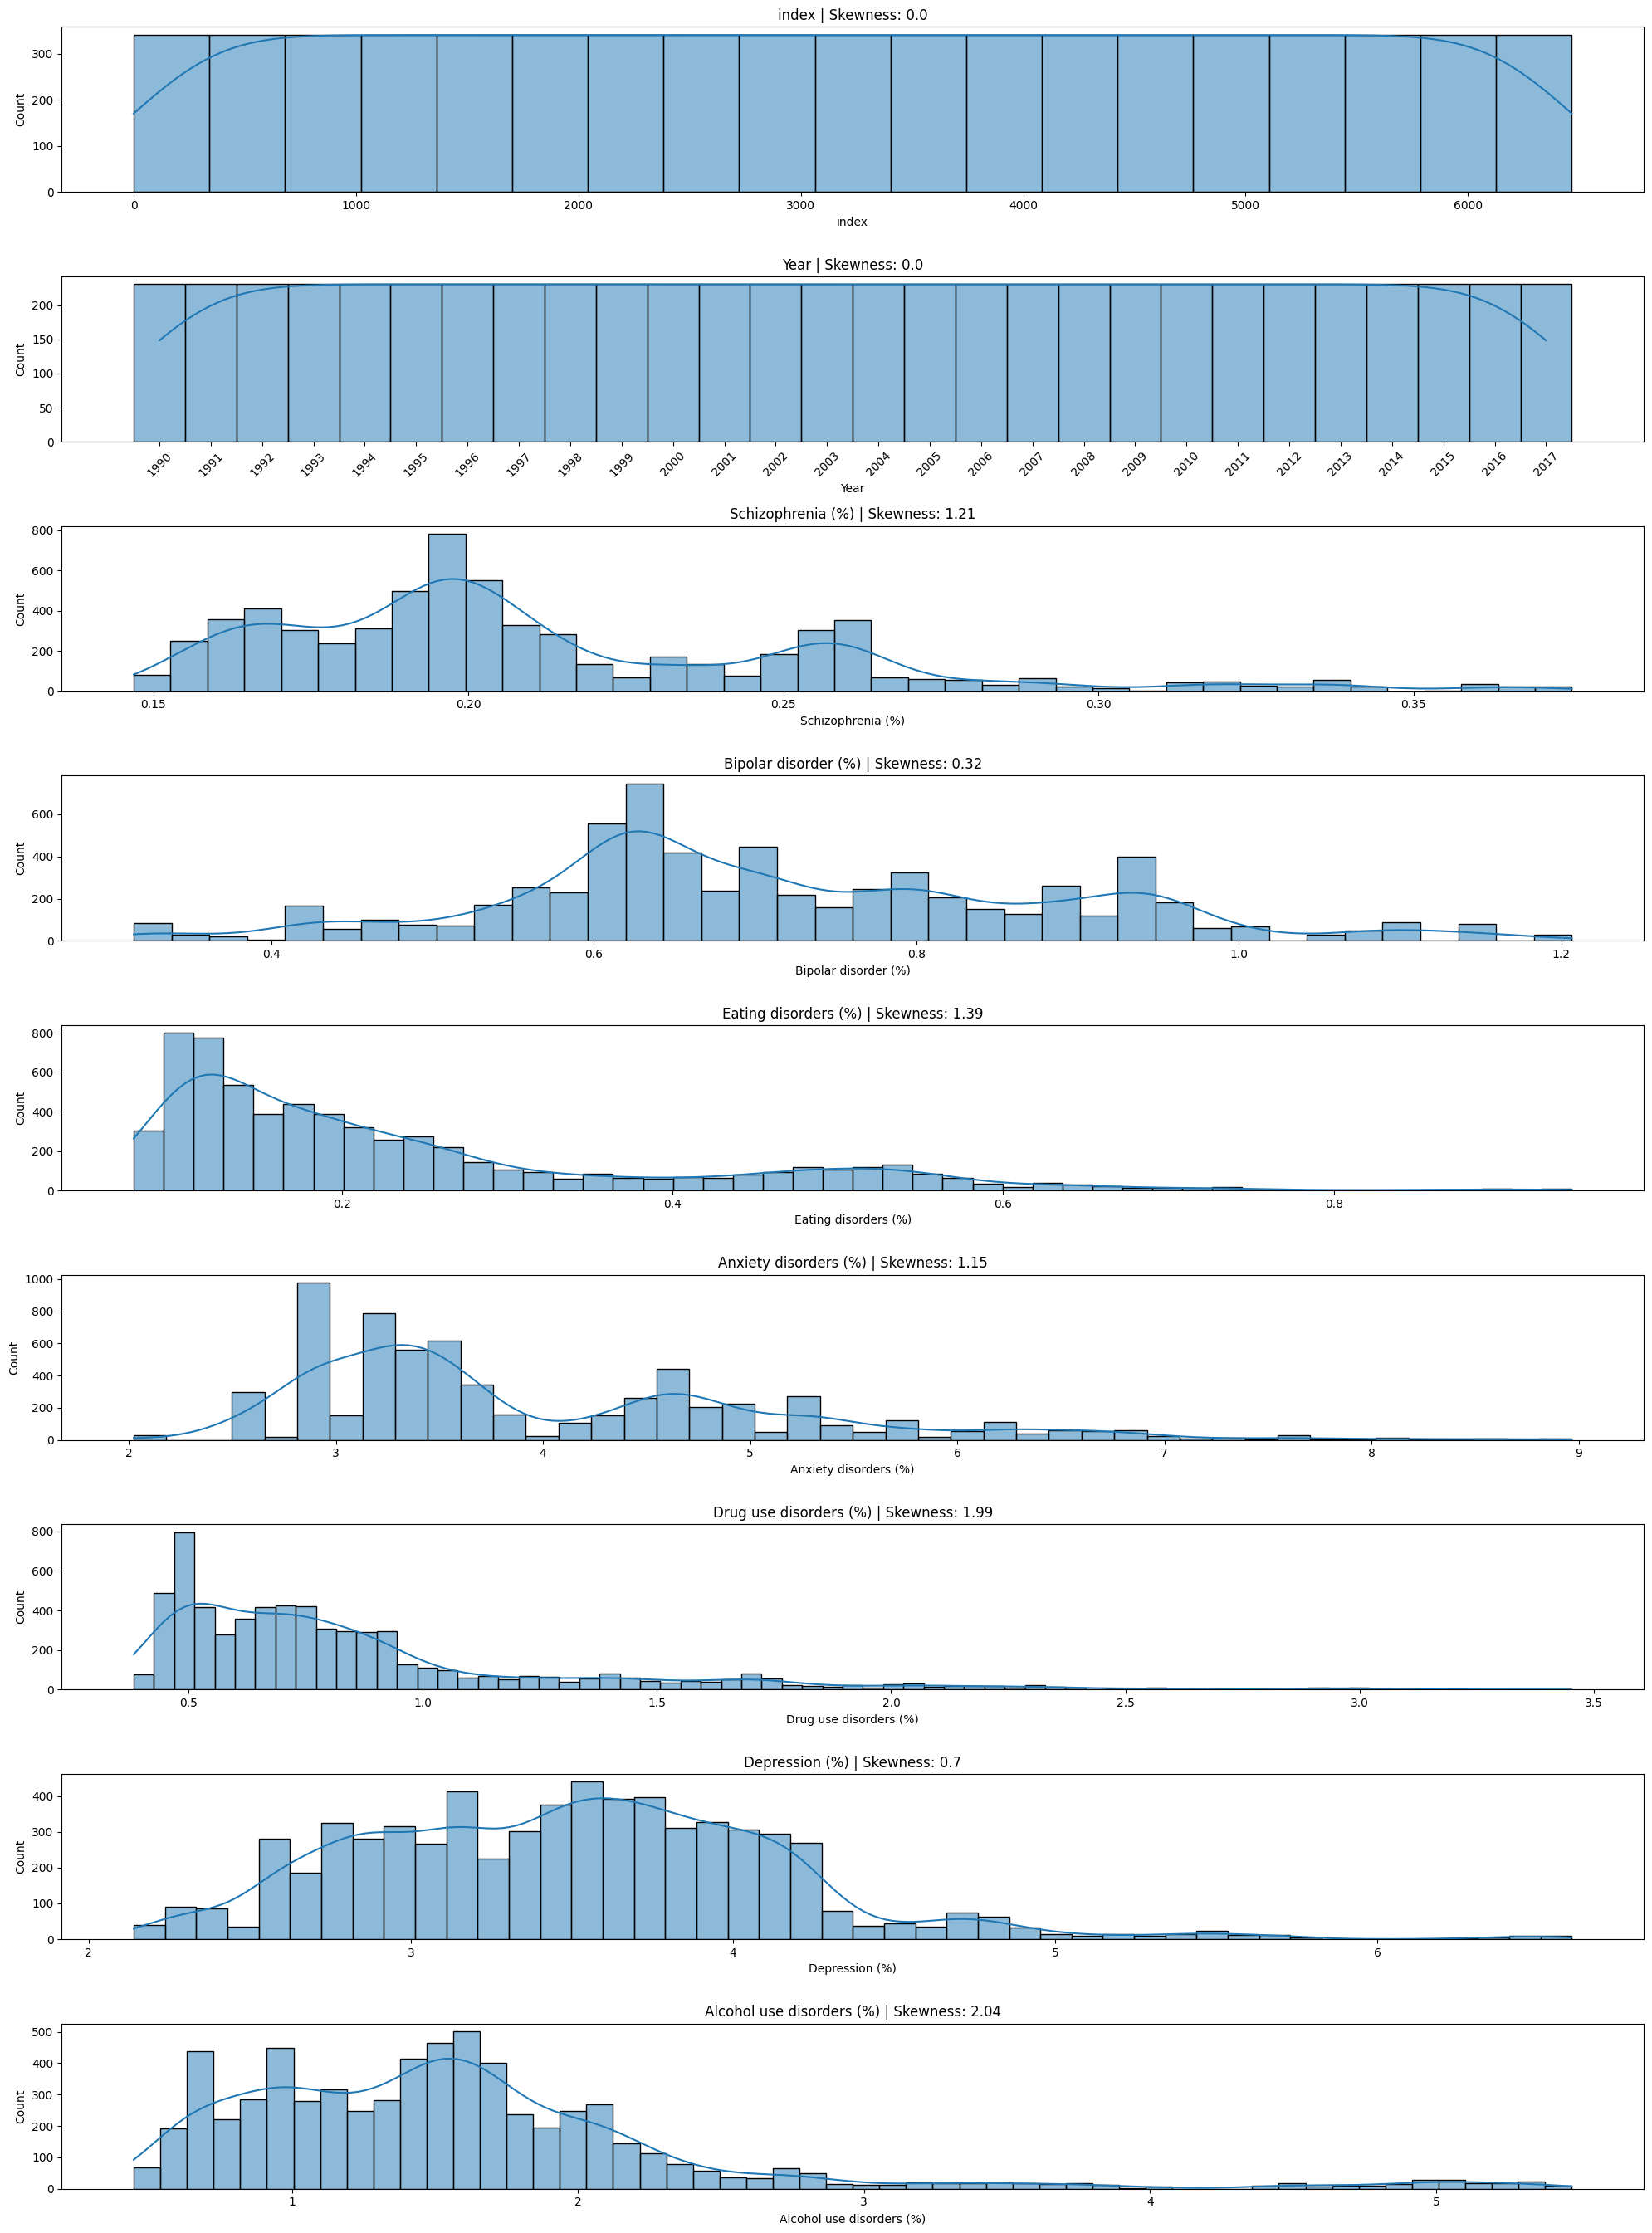

In [8]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(20, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, idx)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
    if feature == 'Year':
        sns.histplot(df[feature].dropna(), kde=True, discrete=True)
        unique_years = df['Year'].dropna().sort_values().unique()  
        plt.xticks(unique_years, rotation=45) 
    else:
        sns.histplot(df[feature].dropna(), kde=True)
    



plt.tight_layout()
plt.show()
